# Homework 3

For this homework, you will be working extensively in tensorflow. It is suggested that you spin up a Google Cloud VM with a GPU attached. Remember, instructions for doing so are found in Homework 0.

### Part 1: Homework 2, but on tensorflow
### Part 2: DNN on MNIST and CIFAR10
### Part 3: VGG on MNIST and CIFAR10
### (Optional) Part 4, getting state of the art (#SOTA)


# Part 1
You don't have to repeat everything in homework 2, but rather pick one set of two features that worked well for you last homework, and implement logistic regression using tensorflow without using keras (you will practice using keras in parts 2 and 3). In other words, using tensorflow operations, please create a scalar-value loss function and let tensorflow create the training operation for logistic regression, which automatically computes the gradients and updates the weight parameters. Note that the logistic loss is a special case of the softmax cross entropy loss that you've seen when classifying MNIST.

# Part 2:  DNN on MNIST and CIFAR10

In our lab, you guys saw how to work with the MNIST dataset to perform image classification. We can attempt the MNIST classification problem with just fully connected layers. This means we will be optimizing for non-banded matrices (no convolutions).

1. Calcualte the number of weight parameters you are optimizing for 1, 2 and 3 differen fully connected layers (the total size of each layer is up to you).
2. What is the max layer depth you can go before training loss does not converge? You can usually tell that something is not converging by examining the training loss vs. iteration curve.
3. How does the number of parameters relate to the training loss and validation/test loss? Try to get a few data points to speak to this question.
3. Keeping the maximum number of parameters possible while still maintaining convergence (i.e., a good training and validation/test loss), what happens when you swap the activation function to `tanh` instead of `relu`? How about `sigmoid`?
4. After exploring the above, train a DNN model with the combination of hyperparameters that you believe will work best on MNIST.
5. Using the same architecture, try training a DNN model on more difficult dataset such as Fashion MNIST or CIFAR10/100. Example download instructions are shown in the next problem.

### Must haves
1. Make a curve of the final validation/test loss of your DNN after the loss plateaus as a function of the number of weight parameters used (final loss versus # parameters used). Note that you might see something like the curve below for a low number of parameters, but as the number of parameters increases, it will not look like this plot. 
2. On the same figure, make the same curve as above, but use different activation functions in your architecture.
3. Plot a point corresponding to your crafted DNN archiecture for question 4.
4. Repeat 1-3 for CIFAR10

The curves when reasonable # params are used look like the below
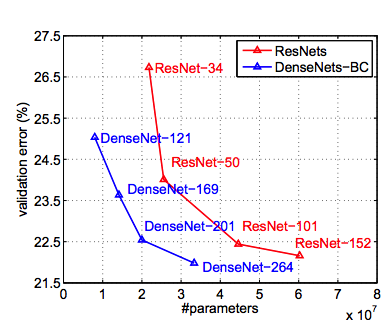

Training data shape (60000, 28, 28, 1)


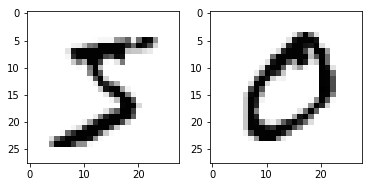

In [33]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets

import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);


In [42]:
# sequential
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
for i in range(2):
    model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.count_params()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_198 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_199 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_200 (Dense)            (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


318410

In [37]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))
hist = model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stop, tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.5803 - acc: 0.8456 - mean_absolute_error: 0.0649 - val_loss: 0.3782 - val_acc: 0.8966 - val_mean_absolute_error: 0.0429
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3456 - acc: 0.9025 - mean_absolute_error: 0.0385 - val_loss: 0.3174 - val_acc: 0.9109 - val_mean_absolute_error: 0.0359
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3236 - acc: 0.9063 - mean_absolute_error: 0.0351 - val_loss: 0.3087 - val_acc: 0.9117 - val_mean_absolute_error: 0.0340
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2967 - acc: 0.9120 - mean_absolute_error: 0.0314 - val_loss: 0.2733 - val_acc: 0.9186 - val_mean_absolute_error: 0.0289
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2751 - acc: 0.9191 - mean_absolute_error: 0.0283 - val_loss: 0.2495 - 

In [43]:
hist.history

{'acc': [0.8455666666666667,
  0.9025333333333333,
  0.9063,
  0.9119833333333334,
  0.9191],
 'loss': [0.5803406664689382,
  0.3456010263442993,
  0.32362657787005106,
  0.2966781908671061,
  0.2751103252331416],
 'mean_absolute_error': [0.06485157536466916,
  0.038526073829332985,
  0.0350896304110686,
  0.03136545974512895,
  0.028308412106831868],
 'val_acc': [0.8966, 0.9109, 0.9117, 0.9186, 0.9255],
 'val_loss': [0.37819694061279296,
  0.3174432236433029,
  0.3087359318971634,
  0.2732552934169769,
  0.2495173381924629],
 'val_mean_absolute_error': [0.042872930479049685,
  0.0358701021283865,
  0.03395751729905605,
  0.028854195922613145,
  0.026118918815255163]}

# Part 3. VGG on CIFAR100 and CIFAR10

VGG is a simple, but powerful CNN created in 2015. Read the VGG paper here: https://arxiv.org/pdf/1409.1556.pdf

Here, we're going to try to reproduce the model's findings on the cifar10 and cifar100 dataset. Note that the paper takes 224 x 224 images, but cifar10 and 100 are only 32 x 32 images.

1. Implement all of the layers for the VGG ConvNet Configuration A. Please use the shell code below as guide. Then, train this network on the Cifar10 and Cifar100 datasets.
2. For Cifar10 and 100, VGG is probably overkill. Try changing the number of layers and number of filters without sacrificing too much performance accuracy. How many filters can you get rid of before you see the accuracy drop by more than 2%? Where in the architecture is it better to remove filters - towards the input layers, or more towards the output layers?
3. For what you experiment with--report the parameter, validation loss curves for changing the number of i) layers, ii) filter size, iii) both.

Training data shape (50000, 32, 32, 3)


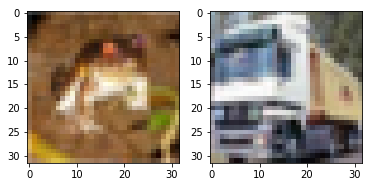

In [29]:
# This is the same model in the other notebook, looks very simplified.
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32, 3));
ax2.imshow(X_train[1].reshape(32, 32, 3));


In [31]:
# Example CNN used in class
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

hist = model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=0,
          validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_156 (Dense)            (None, 512)               2097664   
_________________________________________________________________
dense_157 (Dense)            (None, 10)                5130      
Total para

# (Optional) Part 4, state of the art

Currently, state of the art implementations in the image classification problem are DenseNet: (https://arxiv.org/abs/1608.06993), ResNet (https://arxiv.org/abs/1512.03385), and ResNext (https://arxiv.org/pdf/1611.05431.pdf). Try implementing and training one of these on the cifar10 and cifar100 dataset. Feel free to experiment.

Jargon to learn about
1. What is "residual learning"?
2. What is a "bottleneck layer"?
3. What is a "dense block"?